# Weitere Schritte mit Pandas

## Indexing & Cleaning

Lade deinen Datensatz von letzter Woche relativ zu deinem Arbeitsverzeichnis.
Formatiere deinen DataFrame anschließend so, dass die Column 'Date' als neuer Index fungiert.

In [10]:
# Dein Code
import pandas as pd
'''
Um eine bestimmte Spalte als Index zu verwenden, kann entweder der Name oder die Stelle der Spalte beim Laden dem Attribut 'index_col' mitgegeben werden.
Alternativ kann auch später noch eine bestimmte Column als Index gesetzt werden.
Ein gesetzter Index wird im späteren Verlauf bei wichtigen Berechnungen (z.B. mean, sum) ignoriert.
Auch bei der Visualisierung vereinfacht ein gut gewählter Index die Arbeit und macht die Diagramme anschaulicher.
'''
data = pd.read_csv('data/pageviews-20221026-20221115.csv', index_col='Date')
#data = pd.read_csv('data/pageviews-20221026-20221115.csv', index_col=0)
#data = data.set_index('Date')
data


,Josip Broz Tito,Saban Saulic,Bijelo Dugme
Date,,,
2022-10-26,2300,5,192
2022-10-27,2440,4,192
2022-10-28,2314,0,223
2022-10-29,2253,2,238
2022-10-30,2258,0,274
2022-10-31,2425,3,207
2022-11-01,2682,1,237
2022-11-02,2625,3,196
2022-11-03,2505,4,178


Lösche die Column mit den wenigsten Seitenaufrufen

In [11]:
# Dein Code
'''
Zwei mögliche Wege zum Löschen von Spalten sind die drop und die pop Funktion.
Die drop Funktion wird default auf Zeilen angewandt und hat als Rückgabewert den jeweiligen Dataframe ohne die angegebene Zeile.
In dem das Argument 'axis' auf 1 gesetzt wird, kann mit drop auch eine Column angegeben werden, die dann aus dem zurückgegebenen Dataframe gelöscht wird.
Beachte, dass drop keine permanenten Änderungen am jeweiligen Dataframe vornimmt, um mit drop eine permanente Änderung zu erreichen, muss eine Neuzuweisung passieren (siehe erste auskommentierte Zeile).
'''
min_seitenaufrufe = data.sum().idxmin()
data.drop(min_seitenaufrufe, axis=1)
#data = data.drop(min_seitenaufrufe, axis=1)
'''
Die pop Funktion verhält sich dagegen ganz anders.
Ihr Rückgabewert ist/sind genau die angegebene(n) Column(s).
Die Änderungen sind außerdem permanent und die Funktion lässt sich ausschließlich auf Columns anwenden.
'''
gelöschte_spalte = data.pop(min_seitenaufrufe)

restlicher_dataframe = data


Füge dem DataFrame eine weitere Zeile hinzu, in der die durchschnittlichen Aufrufzahlen der jeweiligen Seite angezeigt werden.

In [19]:
# Dein Code
'''
Um neue Zeilen und Spalten hinzuzufügen, werden unterschiedliche Schreibweisen verwendet.
Neue Zeilen müssen mit hilfe von loc zugewiesen werden, neue Spalten mit der bekannten Zuweisung in eckigen Klammern.
Beachte in diesem Fall, dass sich der Parameter 'axis' genau umgekehrt zu drop verhält.
Default wird die Funktion auf jede Spalte angewandt, um den Durchschnitt einer Zeile zu errechnen, muss 'axis' auf 1 gesetzt werden.
'''
data.loc['Durchschnitt'] = data.mean()
data['Tagesdurchschnitt'] = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]
data['Tagesdurchschnitt'] = {'2022-10-26':1, '2022-10-27': 5}
data

,Josip Broz Tito,Bijelo Dugme,Tagesdurchschnitt
Date,,,
2022-10-26,2300.00000,192.000000,1.0
2022-10-27,2440.00000,192.000000,5.0
2022-10-28,2314.00000,223.000000,NaN
2022-10-29,2253.00000,238.000000,NaN
2022-10-30,2258.00000,274.000000,NaN
2022-10-31,2425.00000,207.000000,NaN
2022-11-01,2682.00000,237.000000,NaN
2022-11-02,2625.00000,196.000000,NaN
2022-11-03,2505.00000,178.000000,NaN


## Visualisierung

Visualisiere die Seitenaufrufe deiner gewählten Seiten, aber ohne den Durchschnittswert auszugeben.


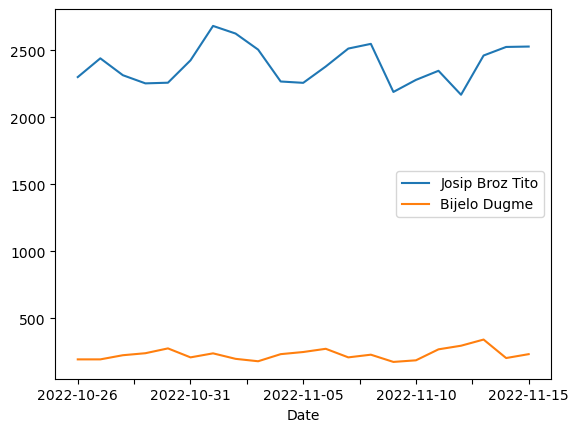

In [13]:
# Dein Code
import matplotlib
'''
Hier können wir uns zum Vorteil machen, dass drop keine permanenten Änderungen vornimmt.
Wir können alle Durchschnitte droppen und anschließend den Dataframe plotten, ohne dass die Durchschnitte komplett verloren sind.
Der letzte Funktionsaufruf 'get_figure' wird benötigt um den Graphen in eine Datenstruktur zu bringen, die auch als Bilddatei gespeichert werden kann.
'''
fig = data.drop('Tagesdurchschnitt', axis=1).drop('Durchschnitt').plot(kind='line').get_figure()
# Alternative Diagramme
#fig1 = data.sum().plot(kind='pie')

Speichere deinen DataFrame in einer Markdown-Datei und auch das Ergebnis der Visualisierung als png-Datei.

In [14]:
# Dein Code
data.to_markdown('markdown_file.md')
fig.savefig('graph.png')

# Rechercheaufgabe
## Input/Output in Python
Recherchiere zuerst was **JSON**, **TXT** und **PICKLE** ist.
Schreibe deine Daten (Name, E-Mail-Adresse, Traumberuf) in ein dictionary.
Speichere dieses Dictionary anschließend in drei Versionen: 'visitenkarte.txt', 'visitenkarte.json' und 'visitenkarte.pkl' relativ zu deinem Arbeitsverzeichnis in dem Ordner 'meine_visitenkarten'.


In [15]:
# Dein Code
'''
Egal ob eine Datei gelesen oder geschrieben werden soll, zuerst muss jede Datei geöffnet werden.
Das passiert in Python am besten durch 'with open('PATH/TO/FILE/FILENAME.txt', 'MODUS') as file'.

open('PATH/TO/FILE/FILENAME.txt', 'MODUS'):
    Dieser Teil öffnet die angegebene Datei im gewählten Modus.

    MODUS Es gibt verschiedene Modi in denen eine Datei geöffnet werden kann:
        'w': öffnet/erstellt die Datei und überschreibt alle Inhalte der Datei.
        'r': öffnet die Datei und ermöglicht das Lesen der Inhalte. (default)
        'x': erstellt die Datei und ermöglicht das Schreiben in die Datei, falls die Datei schon existiert, wird ein Fehler geworfen.
        'a': öffnet/erstellt die Datei und ergänzt die Inhalte (bereits bestehende Inhalte bleiben erhalten)

        Außerdem wird zwischen Text und Binary-Codierung unterschieden.
        't': Textmodus, zum Lesen/Schreiben von Strings und Texten. (default)
        'b': Binarymodus, zum Lesen/Schreiben von Datentypen u.ä.

        Um mehrere Modi gleichzeitig auszuführen, kann mit '+' kombiniert werden.
        Beispiel: open('PATH/TO/FILE/FILENAME.txt', 'w+r') öffnet die Datei im Textmodus (da weder b noch t angegeben wurde) und ermöglicht das Schreiben und Lesen einer Datei.

'''
import pickle
import json
meine_daten = {'Name': 'Jonas',
               'Mail': 'jr74xaqo',
               'Traumberuf': 'Feuerwehr'}

with open('visitenkarte.txt', 'w') as file:
    file.write(str(meine_daten))

with open('visitenkarte.pkl', 'wb') as file:
    pickle.dump(meine_daten, file)

with open('visitenkarte.json', 'w') as file:
    json.dump(meine_daten, file)


Lese die Datei 'visitenkarte.json' jetzt ein und gib in der Konsole den Traumberuf aus.
Versuche das Gleiche mit den anderen Dateitypen

In [16]:
# Dein Code

with open('visitenkarte.txt', 'r') as file:
    data0 = file.readlines()

with open('visitenkarte.pkl', 'rb') as file:
    data1 = pickle.load(file)

with open('visitenkarte.json', 'r') as file:
    data2 = json.load(file)

data1['Traumberuf']
data0


["{'Name': 'Jonas', 'Mail': 'jr74xaqo', 'Traumberuf': 'Feuerwehr'}"]

In [17]:

import pandas as pd
data = pd.read_csv('data/netflix_titles.csv')


FileNotFoundError: [Errno 2] No such file or directory: 'data/netflix_titles.csv'

In [ ]:
data.groupby(['country', 'title']).max('release_year')